In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
MODELS = {DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, SVR, NuSVR,
          LinearRegression, BayesianRidge, KNeighborsRegressor, XGBRegressor, XGBRFRegressor, RadiusNeighborsRegressor,
          ElasticNet, SGDRegressor, KernelRidge, LassoLars, Lasso, }


In [3]:
housing = pd.read_csv(r'./datasets/kc_house_data.csv').sample(5000)
quality = pd.read_csv(r'./datasets/winequality-red.csv')


In [4]:
housing


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13252,2461900760,20150401T000000,553000.0,3,1.00,1380,6250,1.0,0,0,...,7,1380,0,1918,0,98136,47.5514,-122.385,2270,6250
16966,9839300285,20150412T000000,720000.0,3,2.50,2100,2200,2.0,0,0,...,7,1500,600,1919,0,98122,47.6140,-122.294,1750,4400
1335,8961990160,20150413T000000,567500.0,3,2.50,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
4350,2770604079,20141029T000000,659950.0,3,2.50,1610,1246,2.0,0,1,...,9,1080,530,2014,0,98119,47.6423,-122.375,1610,1249
8632,1994200375,20141203T000000,601150.0,2,2.00,1660,5200,1.0,0,0,...,7,1120,540,1906,0,98103,47.6871,-122.334,1260,5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,7974200822,20140530T000000,750000.0,4,2.75,2600,4674,1.0,0,0,...,8,1560,1040,1976,0,98115,47.6782,-122.286,2600,6099
2784,3601200465,20150123T000000,340000.0,4,2.75,3527,7200,2.0,0,0,...,7,3527,0,2005,0,98198,47.3823,-122.300,2490,7200
439,284000223,20140916T000000,578000.0,3,1.75,2120,10875,1.0,0,2,...,8,1540,580,1977,0,98146,47.5040,-122.382,2460,11760
20151,53500020,20150114T000000,248000.0,3,2.50,1870,4046,2.0,0,0,...,7,1870,0,2007,0,98042,47.3420,-122.059,2130,4800


In [5]:
quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
housing = housing.dropna()
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 13252 to 14501
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  lon

In [7]:
quality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
def metrics(tt, tp, vt, vp, model,
            time=None): return {
    "model": model,
    'time': time,
    "mse": (mean_squared_error(tt, tp),
            mean_squared_error(vt, vp)),
    'r2': (r2_score(tt, tp),
           r2_score(vt, vp))
}


def create_model(X, y, model_name,
                 time_it: bool = False):
    model = Pipeline([
        ('scaler1', RobustScaler()),
        ('scaler2', MinMaxScaler()),
        ('model', model_name())
    ])
    if time_it == True:
        begin = time.time()
        model.fit(X, y)
        end = time.time()
        return (model, end - begin)
    return model.fit(X, y)


def get_metrics(X, y, model_name):
    Xt, Xv, yt, yv = train_test_split(
        X, y, train_size=.7)
    results = create_model(Xt, yt, model_name, time_it=True)
    model, time = results[0], results[1]
    return metrics(
        yt, model.predict(Xt), yv,
        model.predict(Xv), model_name, time)


def get_results(X, y, models):
    results = []
    for i in models:
        try:
            results.append(get_metrics(X, y, i))
        except:
            pass
    return results


def plot_results(results: 'list[dict]'):
    y = [i['model'] for i in results]
    pos = np.arange(len(y))
    plt.barh(pos, [i['mse'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Validation')
    plt.show()
    plt.barh(pos, [i['mse'][0] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Traning')
    plt.show()
    plt.barh(pos, [i['time'] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Time')
    plt.show()
    plt.barh(pos, [i['r2'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('R2')
    plt.show()
    plt.barh(pos, [i['time'] * i['mse'][1] * -
             1 for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Efficiency (Higher the better)')
    plt.show()
    plt.barh(pos, [-1 * i['time'] * i['mse'][1] / (i['mse']
             [1] - i['mse'][0]) for i in results], align='center')
    plt.yticks(pos, y)
    plt.title('Weighted Efficiency (Higher the better)')
    plt.show()


In [9]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 13252 to 14501
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  lon

In [10]:
quality_X = quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode',
           'lat', 'long', 'price'], axis=1)
housing_y = housing['price']


In [11]:
housing_y


13252    553000.0
16966    720000.0
1335     567500.0
4350     659950.0
8632     601150.0
           ...   
14966    750000.0
2784     340000.0
439      578000.0
20151    248000.0
14501    171500.0
Name: price, Length: 5000, dtype: float64

In [12]:
quality_results, housing_results = get_results(
    quality_X, quality_y, MODELS), get_results(
    housing_X, housing_y, MODELS)


c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\neighbors\_regression.py:482: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.war

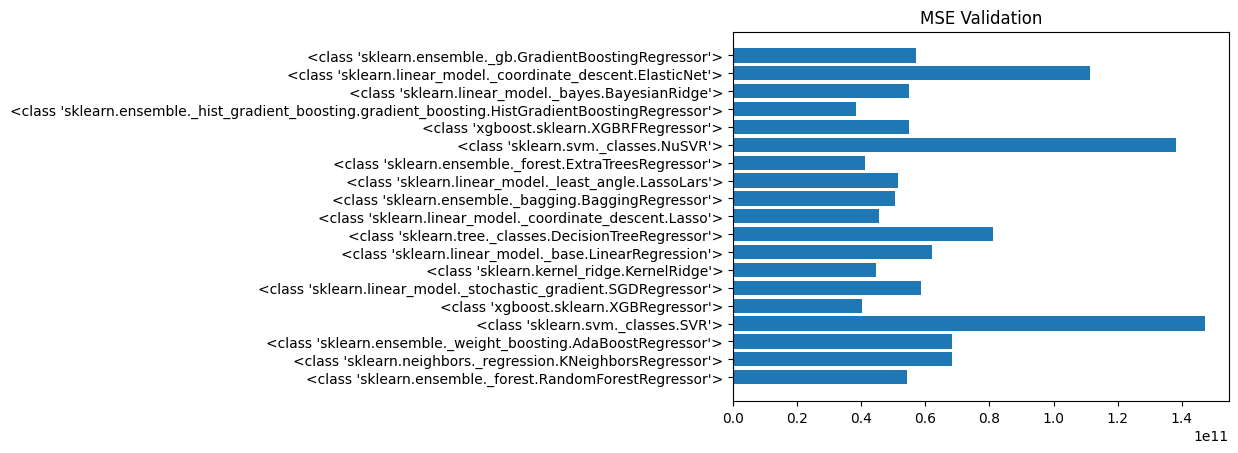

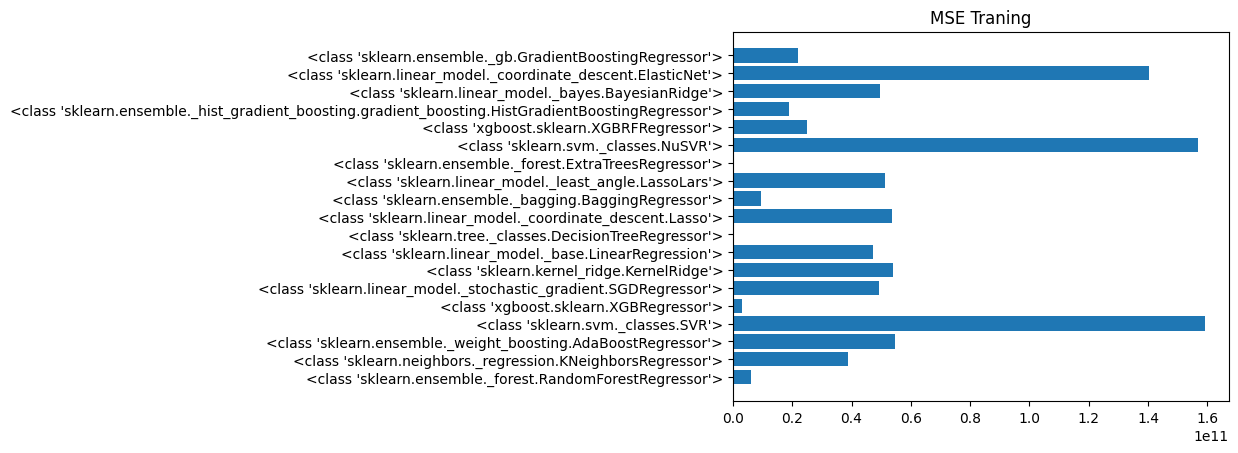

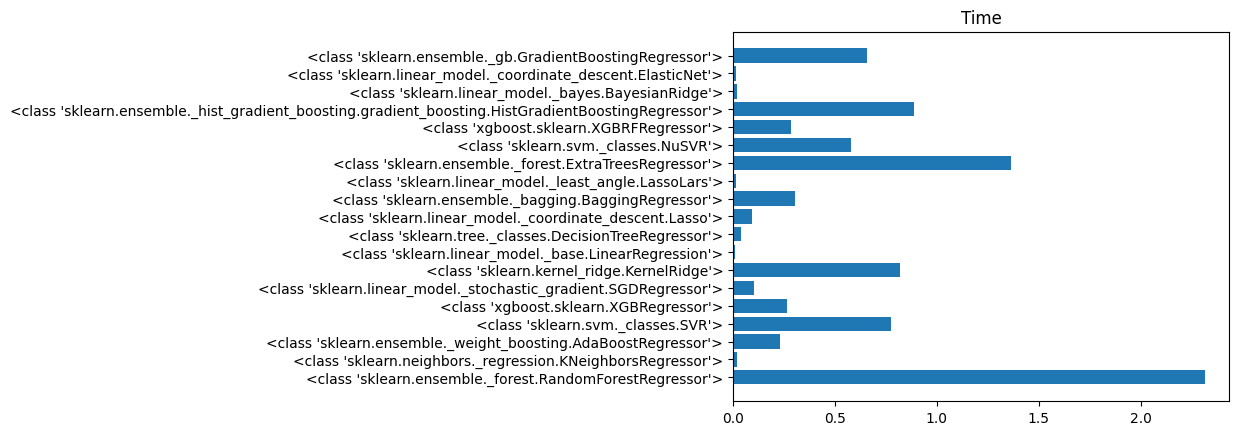

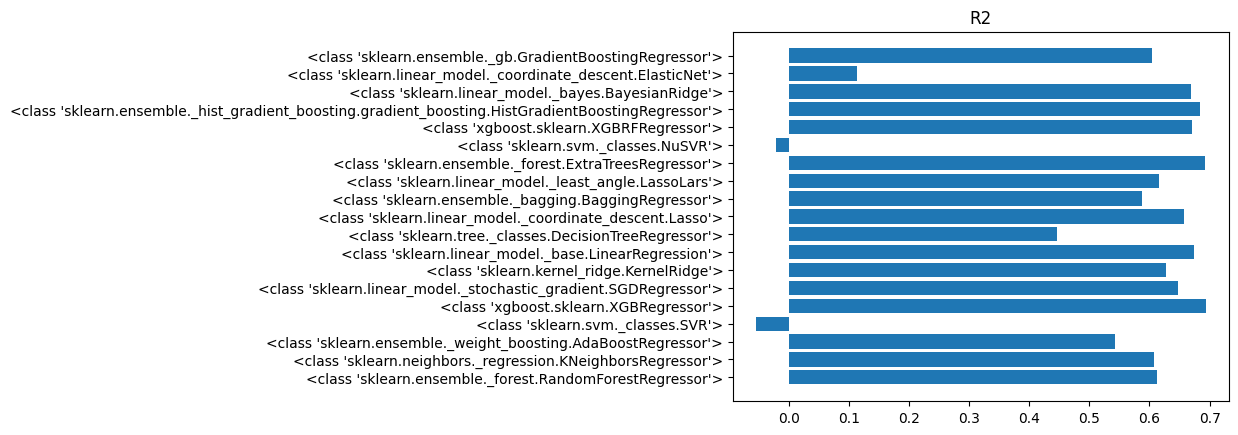

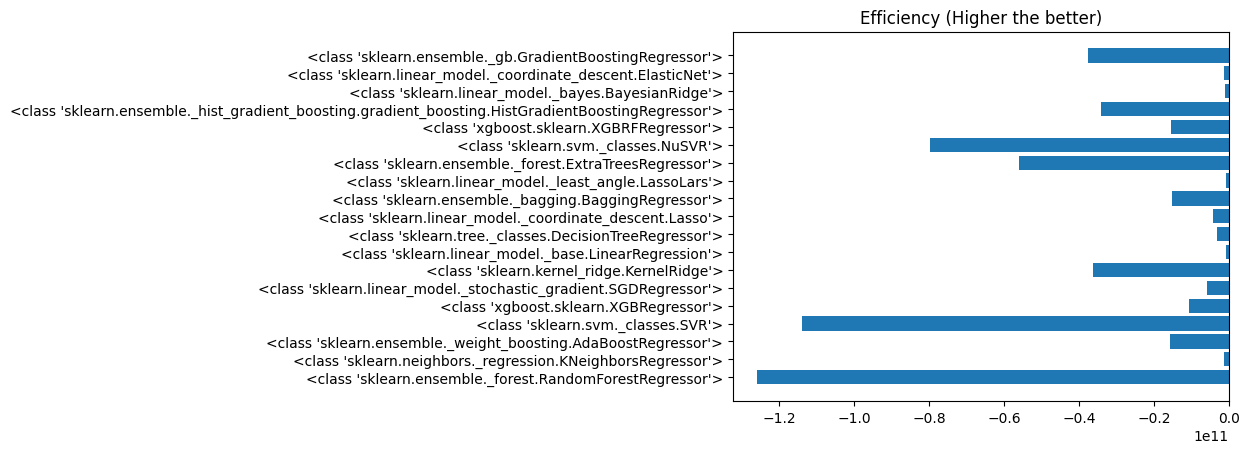

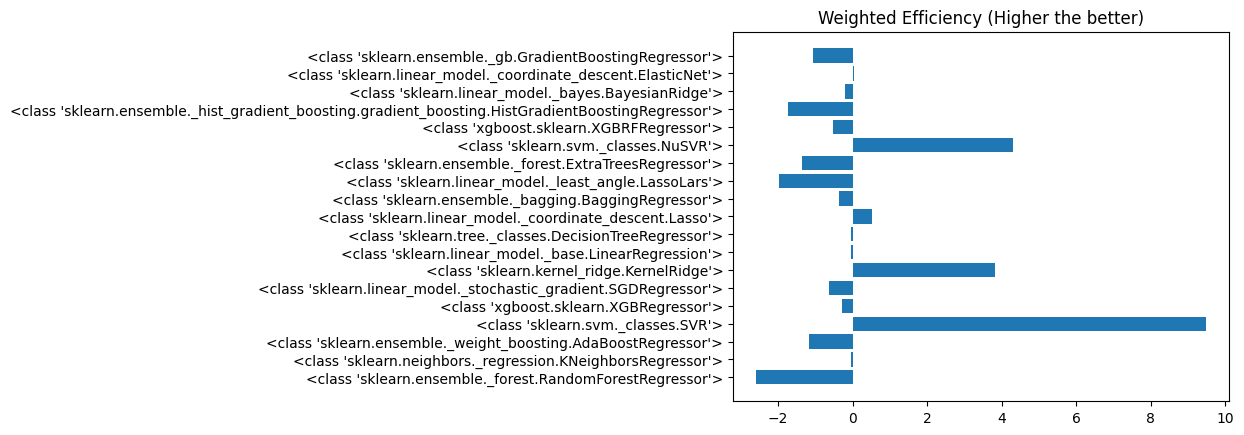

In [13]:
plot_results(housing_results)


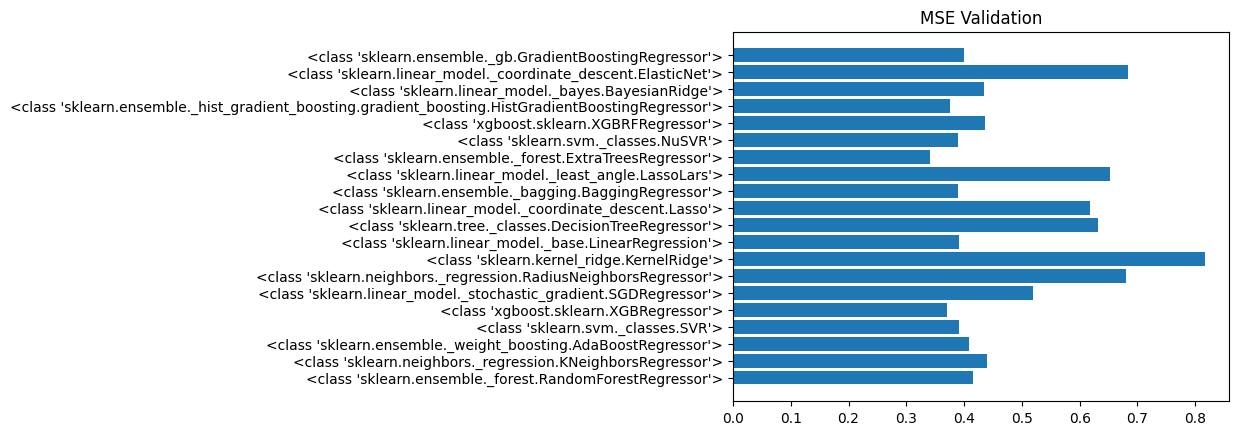

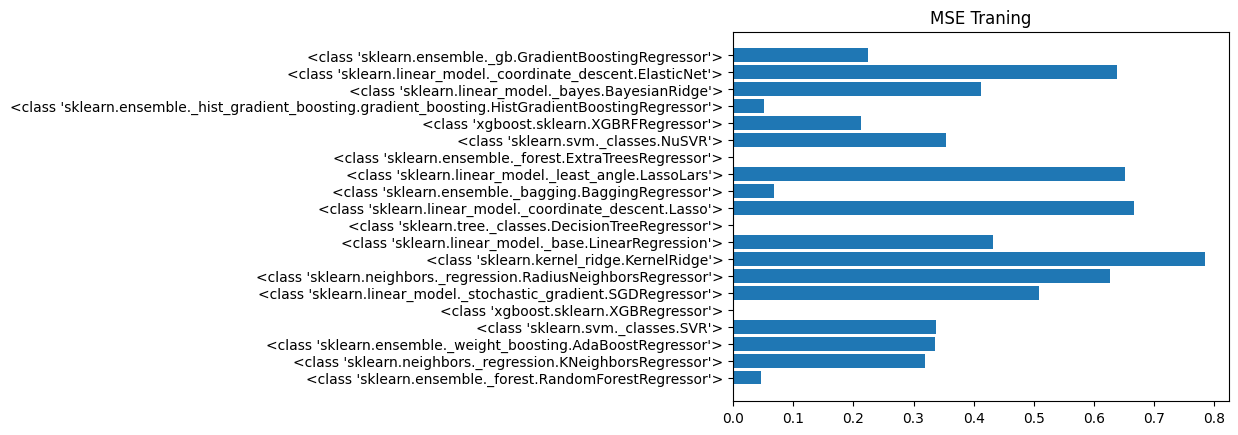

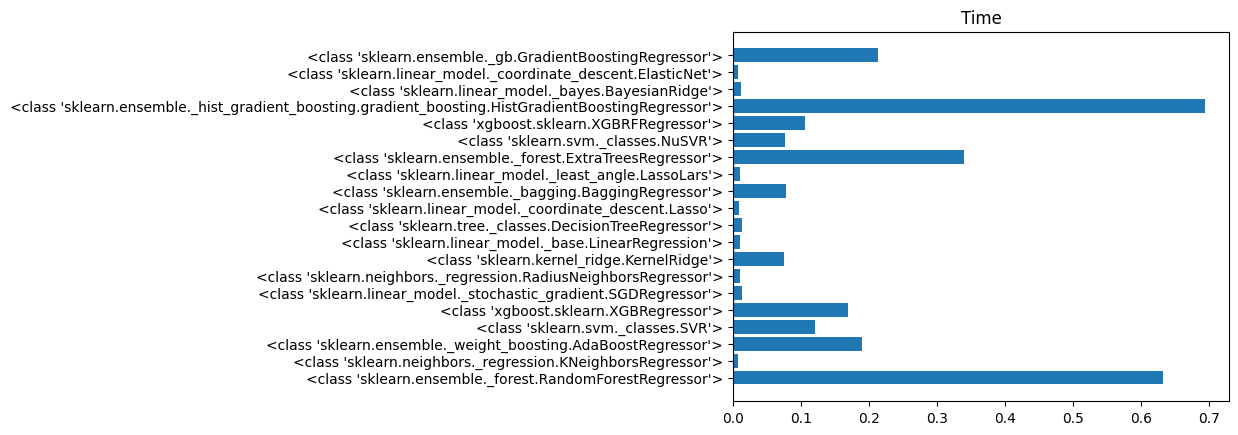

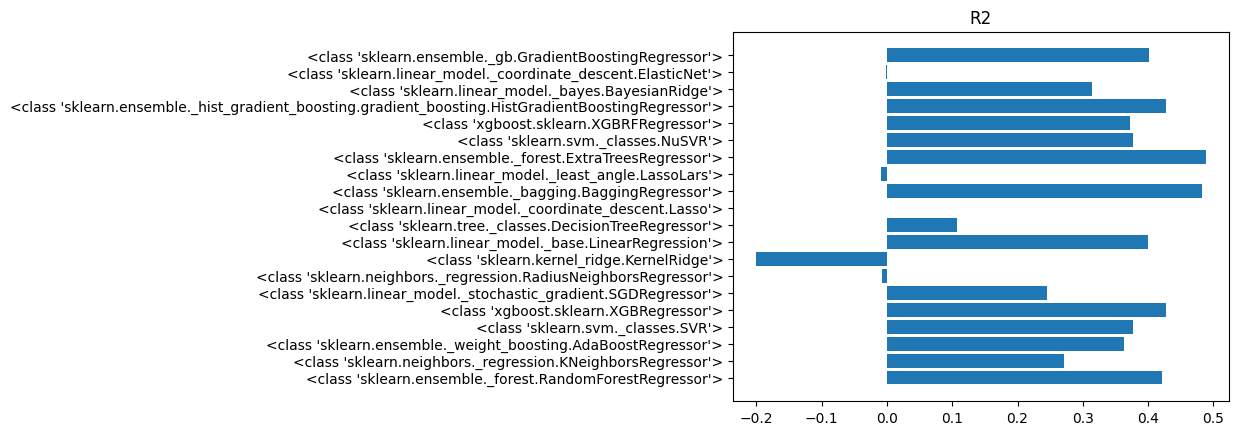

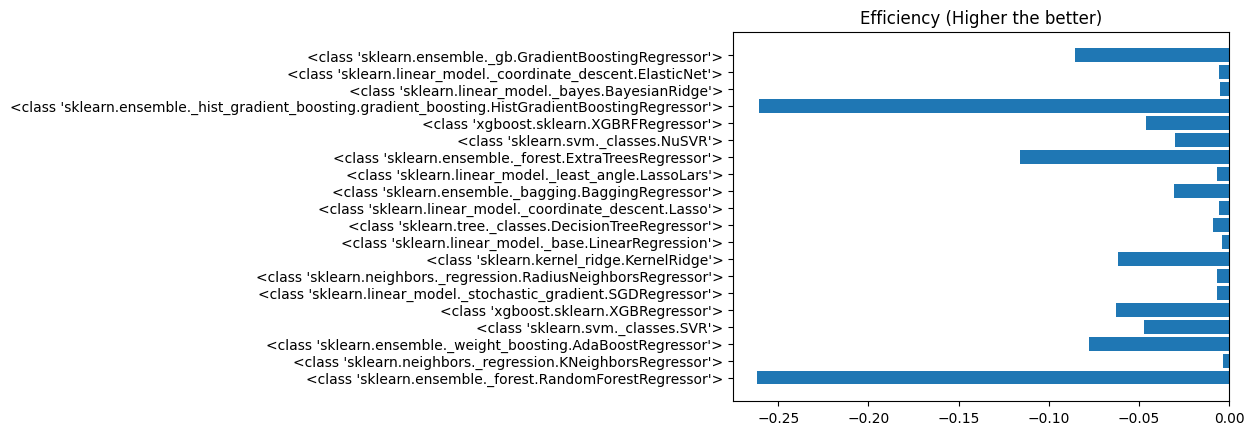

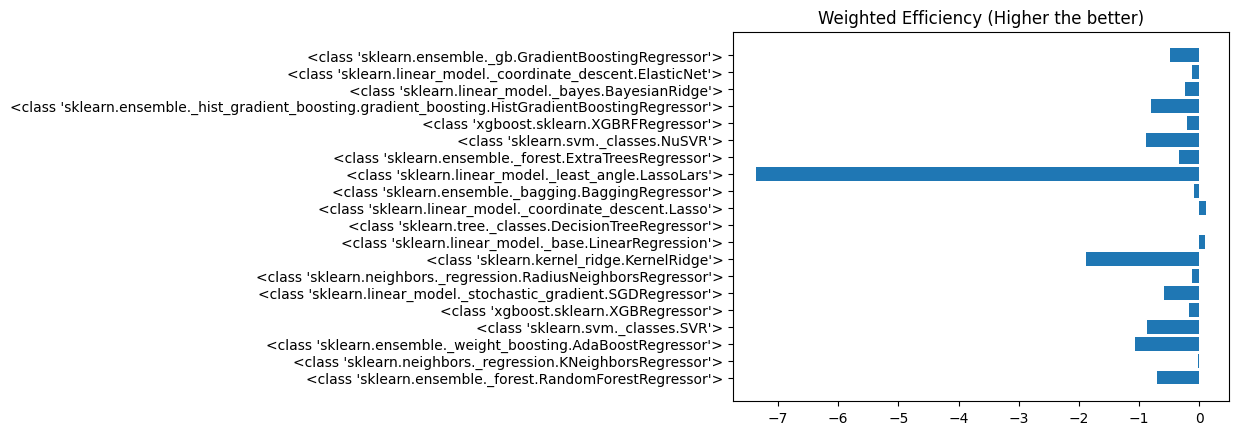

In [14]:
plot_results(quality_results)


In [15]:

import numpy as np
import pandas as pd
from numba import prange
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import math


class VGBRegressor(object):
    def __init__(
        self,
        *,
        learning_rate: float = 0.05,
        n_estimators: int = 100,
        custom_loss=None,
        early_stopping: bool = False,
        early_stopping_min_delta: float = 0.001,
        early_stopping_patience: int = 10,
        complexity: bool = False,
        custom_models: list = None
    ):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.custom_loss = custom_loss
        self.early_stopping = early_stopping
        self._X = None
        self._y = None
        if custom_models:
            self._models = custom_models
        else:
            if complexity:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor, ExtraTreesRegressor,
                                RadiusNeighborsRegressor, ElasticNet, LassoLars, Lasso, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor,
                                BaggingRegressor, SVR, NuSVR, XGBRegressor, XGBRFRegressor, SGDRegressor, KernelRidge, MLPRegressor)
            else:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor,
                                RadiusNeighborsRegressor, ElasticNet, LassoLars, Lasso, SGDRegressor, BaggingRegressor)
        self._ensemble = []

    def _metrics(self, vt, vp, model, time=None):
        if self.custom_loss:
            return {'model': model, 'time': time, 'loss': self.custom_loss(vt, vp)}
        return {"model": model, "time": time, "loss": mean_absolute_error(vt, vp)}

    def _create_model(self, X, y, model_name, time_it: bool = False):
        model = Pipeline([
            ('scaler1', RobustScaler()),
            ('model', model_name())
        ])
        model_name()
        if time_it:
            begin = time.time()
            model.fit(X, y)
            end = time.time()
            return (model, end - begin)
        return (model.fit(X, y), None)

    def _get_metrics(self, X, y, model_name):
        Xt, Xv, yt, yv = train_test_split(X, y)
        results = self._create_model(Xt, yt, model_name, time_it=False)
        model, time = results[0], results[1]
        return self._metrics(yv,
                             model.predict(Xv), model, time)

    def _get_results(self, X, y) -> list:
        results = []
        for i in self._models:
            try:
                results.append(self._get_metrics(X, y, i))
            except:
                pass
        return results

    def fit(self, X_train, y_train):
        # base model: mean
        # computer residuals: y - y hat
        # for n_estimators: a) y = prev residuals && residuals * learning rate
        # ada boost and adaptive scaling for learning rates

        preds = pd.DataFrame(
            data={'p0': np.full((len(y_train)), y_train.mean(skipna=True))})
        residuals = pd.DataFrame(
            data={'r0': y_train - y_train.mean(skipna=True)})

        for i in prange(1, self.n_estimators + 1):
            y = residuals[f'r{i - 1}']
            results = self._get_results(X_train, y)
            min_loss = min(results, key=lambda d: d.get(
                "loss", float('inf')))["loss"]  # https://stackoverflow.com/a/19619294
            min_model = [i['model']
                         for i in results if min_loss == i['loss']][0]
            residuals[f'r{i}'] = min_model.predict(
                X_train) * self.learning_rate
            X_train[f'r{i}'] = residuals[f'r{i - 1}']
            self._ensemble.append(min_model)
        return self._ensemble, residuals


In [17]:
import warnings
warnings.filterwarnings("ignore")


In [18]:
model = VGBRegressor(n_estimators=10, complexity=True)


In [19]:
model.fit(quality_X, quality_y)


([Pipeline(steps=[('scaler1', RobustScaler()), ('model', BaggingRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', ExtraTreesRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', BayesianRidge())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())])],
             r0        r1       r2        r3            r4            r5  \
 0    -0.636023 -0.016801 -0.00084 -0.000047 -2.337991e-06 -1.168995e-07   
 1    -0.636023 -0.036801 -0.00184 -0.000091 -4